# CALORIES BURN PREDICTION

The fast food consumption rate is high nowadays and has led to the intake of unhealthy food. This leads to various heath issues such as obesity, diabetes , an increase in blood pressure etc.
This project focuses on the calories burned in accordance with the duration provided and heart rate during the exercise period.
This research helps in providing the benefits of a machine learning algorithm over predicting the calories burned.


# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
from matplotlib import style
style.use("seaborn")

import warnings
warnings.filterwarnings('ignore')

# Uploading dataset

In [2]:
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4
14996,17212577,female,27,165,65,6,85,39.2
14997,17271188,female,43,159,58,16,90,40.1
14998,18643037,male,78,193,97,2,84,38.3


# Overview of dataset

In [5]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [7]:
#Merging the dataset based on user id

exercise_df = exercise.merge(calories , on = "User_ID")
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


In [8]:
exercise_df.shape

(15000, 9)

In [9]:
exercise_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.1+ MB


1.User_ID : The ID of the person which is unique.\ 2.Gender : Gender of the person.\ 3.Age : Age of the person.\ 4.Height : Height of the person in cm .\ 5.Weight : Weight of the person in kg .\ 6.Duration : Duration of the person's exercise/activity in min.\ 7.Heart_Rate : Heart rate per min of the person.\ 8.Body_Temp : Body temperature of the person in celsius
.\ 9.Calories : Calories burned in kilo calories.

# Dataset overall statistics

In [10]:
exercise_df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


As we can see, the table above shows the Descriptive Statistics(for example centeral tendency) of each column or feature.

In [11]:
#Checking null values in the dataset

exercise_df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Hence there is no null values present in the dataset we dont have a problem.so we can proceed with next step.

# Drop duplicates

Lets check any duplicates in the column "user id" because its a unique feature

In [12]:
print("Before dropping duplicates : " , exercise_df.shape)
exercise_df.drop_duplicates(subset = ['User_ID'],inplace = True)  
print("After dropping duplicates : " , exercise_df.shape)

Before dropping duplicates :  (15000, 9)
After dropping duplicates :  (15000, 9)


The shape of dataset is same before and after dropping duplicates.Its a good sign to carry out. 

In [13]:
#Dropping userid

exercise_df.drop(columns = "User_ID" , inplace = True)

we are dropping the column 'user id' because its a useless feature may be it can affect our accuracy so good way is drop it.

<AxesSubplot:>

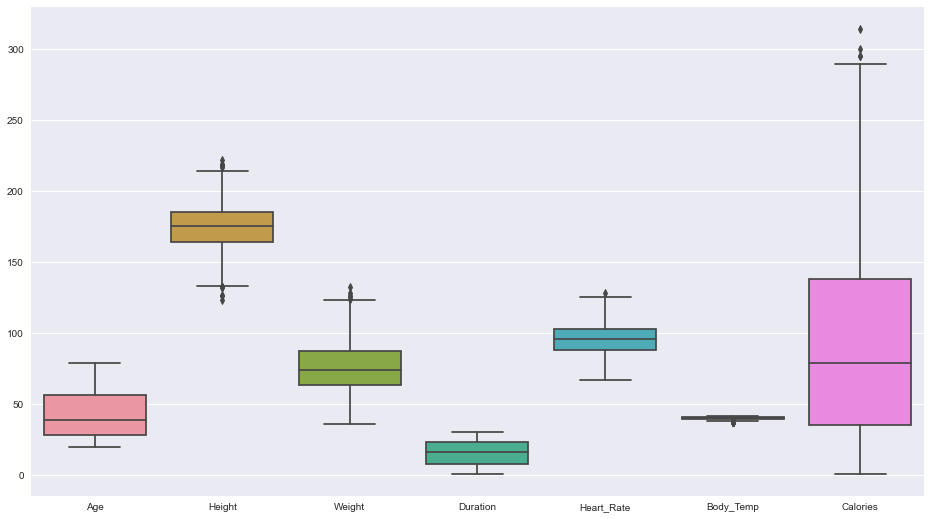

In [14]:
#Finding outliers using boxplot

plt.figure(figsize=(16,9))
sns.boxplot(data=exercise_df)


Detecting outliers using the Inter Quantile Range(IQR) Criteria: data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers.

1 Sort the dataset in ascending order,
2 calculate the 1st and 3rd quartiles(Q1, Q3)
3 compute IQR=Q3-Q1,
4 compute lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR),
5 loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

In [15]:
def detect_outliers_iqr(data):
    outliers_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers_list.append(i)
    return outliers_list

for i in [exercise_df['Height'],exercise_df['Weight'],exercise_df['Heart_Rate'],exercise_df['Body_Temp'],exercise_df['Calories']]:
    sample_outliers = detect_outliers_iqr(i)
    print("Outliers from IQR 1: ", sample_outliers)

Outliers from IQR 1:  [123, 126, 127, 132, 132, 132, 132, 132, 217, 217, 218, 218, 219, 222]
Outliers from IQR 1:  [124, 124, 126, 126, 128, 132]
Outliers from IQR 1:  [128]
Outliers from IQR 1:  [37.1, 37.2, 37.2, 37.2, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.3, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.4, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.6, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7, 37.7,

Handling Outliers

Quantile based flooring and capping
the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.
Computing 10th, 90th percentiles and replacing the outliers

In [16]:
def handle_outliers(data):
    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)
    #print("10percentile height ",tenth_percentile)
    #print("90th percentile height ",ninetieth_percentile)
    b = np.where(data<tenth_percentile, tenth_percentile, data)
    #print(b)
    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
for i in ['Height','Weight','Heart_Rate','Body_Temp','Calories']:
    exercise_df[i]=handle_outliers(exercise_df[i])
    
exercise_df


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29,105.0,40.8,181.0
1,female,20,166.0,60.0,14,94.0,40.3,66.0
2,male,69,179.0,79.0,5,88.0,38.9,26.0
3,female,34,179.0,71.0,13,100.0,40.5,71.0
4,female,27,156.0,58.0,10,83.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11,92.0,40.4,45.0
14996,female,27,165.0,65.0,6,85.0,39.2,23.0
14997,female,43,159.0,58.0,16,90.0,40.1,75.0
14998,male,78,193.0,95.0,2,84.0,38.9,14.0


<AxesSubplot:>

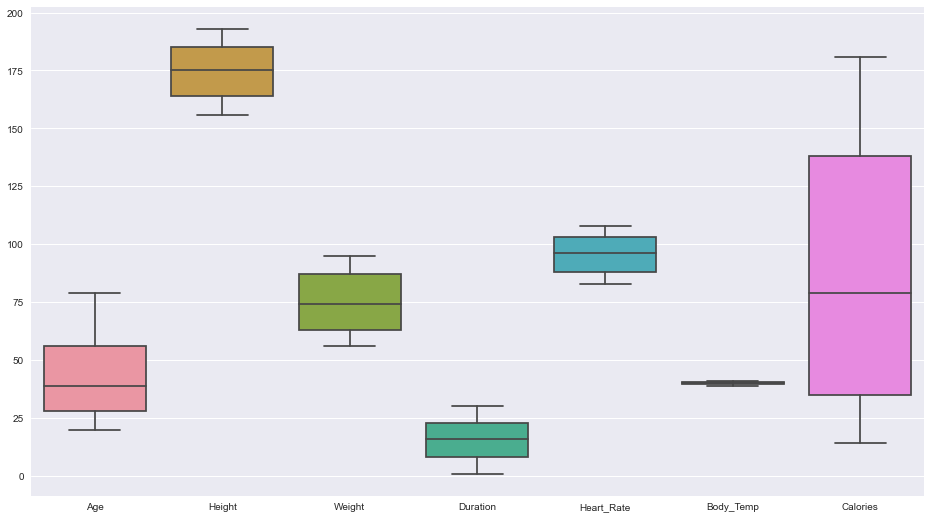

In [17]:
#Plotting the boxplot after treating the outliers

plt.figure(figsize=(16,9))
sns.boxplot(data=exercise_df)

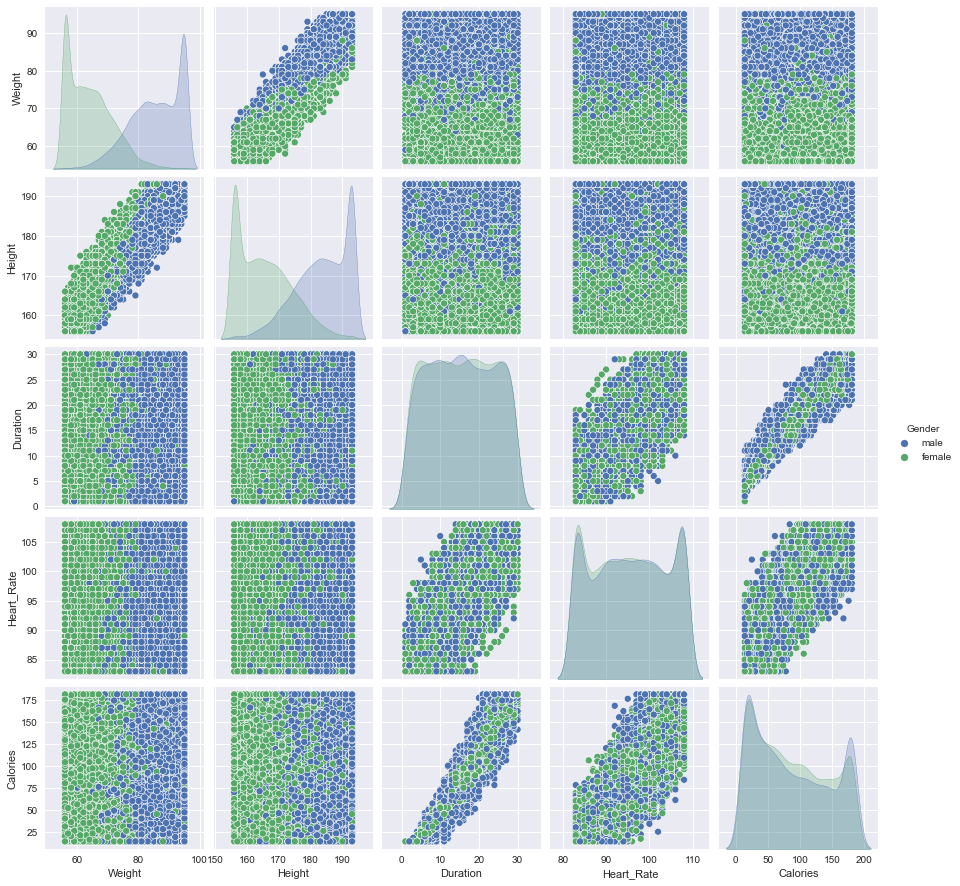

In [18]:
#Correlation using pairplot

sns.pairplot(exercise_df[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories", "Gender"]] , hue = "Gender")

As we can see from graphs above, there is not a specific correlation or relationship between most of the features in the dataset.For example,there is not a specific relationship between Duration and Weight or between Duration and Hight.This is because exercisers may have different exercise duration no matter of their Weight and Height.

In some cases, a featrue has a low relationship with another feature, like Duration and Heart_Rate.Somehow we can say that the more time somebody exercises the more 'Heart Rate' per minute he/she will have.

In some cases , two featrues have a high relationship(in compare to last two cases), like Height and Weight.

Finding Correlation

In [19]:
corr = exercise_df.corr()

<AxesSubplot:>

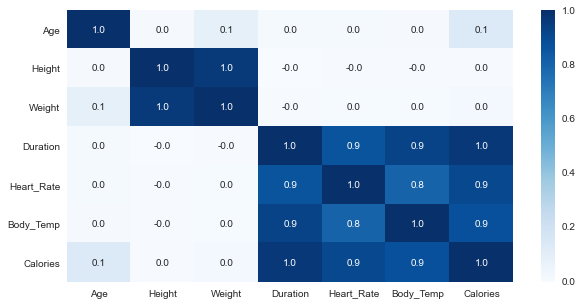

In [20]:
#Constructing heatmap to understand the correlation

plt.figure(figsize=(10,5))
sns.heatmap(corr, fmt='.1f', annot= True, cmap='Blues')

This heatmap shows the correlation of both features in each cell.As we can see, many features have high correlation with another feature.One thing that has to be mentioned is that we have to drop useless features as many as possible.Because when we have many features the dimension of feature space will be very large and when our model runs on this features it will be very slow.Because of that we have to drop some features.

If two or more features have a high correlation with each other, we have to save one of them and drop the rest.In This way, we can improve model's efficiency.

Accorfing to the heatmap height and weight are highly correlated so we have either drop one of the column or we have to combine two columns into one and drop that two columns.

To solve the problem we are going to calculate bmi value using height and weight and add the column to the dataset,after that we are going to drop the height and weight.

In [21]:
#calculating bmi value

exercise_df['Bmi'] = exercise_df['Weight']/((exercise_df['Height']/100)**2)
exercise_df['Bmi'] = round(exercise_df['Bmi'],2)

In [22]:
exercise_df

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Bmi
0,male,68,190.0,94.0,29,105.0,40.8,181.0,26.04
1,female,20,166.0,60.0,14,94.0,40.3,66.0,21.77
2,male,69,179.0,79.0,5,88.0,38.9,26.0,24.66
3,female,34,179.0,71.0,13,100.0,40.5,71.0,22.16
4,female,27,156.0,58.0,10,83.0,39.8,35.0,23.83
...,...,...,...,...,...,...,...,...,...
14995,female,20,193.0,86.0,11,92.0,40.4,45.0,23.09
14996,female,27,165.0,65.0,6,85.0,39.2,23.0,23.88
14997,female,43,159.0,58.0,16,90.0,40.1,75.0,22.94
14998,male,78,193.0,95.0,2,84.0,38.9,14.0,25.50


In [23]:
exercise_df.drop(['Height'],axis=1,inplace=True)
exercise_df.drop(['Weight'],axis=1,inplace=True)
exercise_df

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi
0,male,68,29,105.0,40.8,181.0,26.04
1,female,20,14,94.0,40.3,66.0,21.77
2,male,69,5,88.0,38.9,26.0,24.66
3,female,34,13,100.0,40.5,71.0,22.16
4,female,27,10,83.0,39.8,35.0,23.83
...,...,...,...,...,...,...,...
14995,female,20,11,92.0,40.4,45.0,23.09
14996,female,27,6,85.0,39.2,23.0,23.88
14997,female,43,16,90.0,40.1,75.0,22.94
14998,male,78,2,84.0,38.9,14.0,25.50


In [24]:
#checking the minimum and maximum age

print('Minimum age in dataset is : ' , exercise_df["Age"].min())
print('Maximum age in dataset is : ' , exercise_df["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


The oldest person in dataset is 79yrs old and youngest is 20yrs old.we are going to divide into ranges and convert continous column into categorical column.


In [25]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
exercise_df["age_groups"] = pd.cut(exercise_df["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)

In [26]:
exercise_df

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi,age_groups
0,male,68,29,105.0,40.8,181.0,26.04,Old
1,female,20,14,94.0,40.3,66.0,21.77,Young
2,male,69,5,88.0,38.9,26.0,24.66,Old
3,female,34,13,100.0,40.5,71.0,22.16,Young
4,female,27,10,83.0,39.8,35.0,23.83,Young
...,...,...,...,...,...,...,...,...
14995,female,20,11,92.0,40.4,45.0,23.09,Young
14996,female,27,6,85.0,39.2,23.0,23.88,Young
14997,female,43,16,90.0,40.1,75.0,22.94,Middle-Aged
14998,male,78,2,84.0,38.9,14.0,25.50,Old


In [27]:
exercise_df["age_groups"].value_counts()

Young          7502
Middle-Aged    4405
Old            3093
Name: age_groups, dtype: int64

<AxesSubplot:xlabel='age_groups', ylabel='count'>

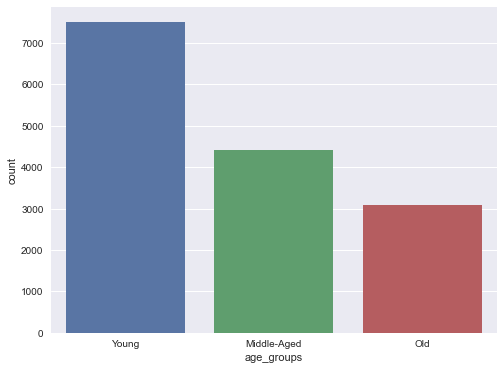

In [28]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_df, x = "age_groups")

As we expected, there is a significant difference between in counts of different age groups.Most of the people of this dataset are young.The second is middle-aged and the third one is old

<AxesSubplot:xlabel='age_groups', ylabel='Calories'>

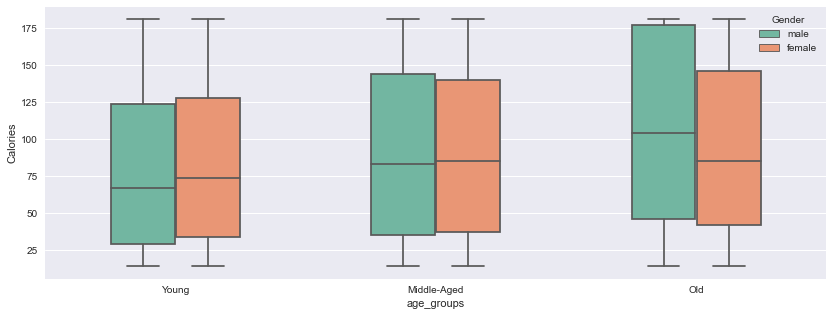

In [29]:
plt.figure(figsize=(14,5))
sns.boxplot(data=exercise_df , x= "age_groups" , y = "Calories" , hue = "Gender",palette="Set2",width=0.5)


As we can observe, old individuals have burned more kilocalories in compare of two other age groups.And the young persons are the least in burning kilocalories which is a surprise!

Another interesting thing is, females in all age ranges performed very similar.In other words, they burned same amount of kilocalories in average.But for males, old group outperformed and the youth have the weakest performance.

<AxesSubplot:xlabel='age_groups', ylabel='Duration'>

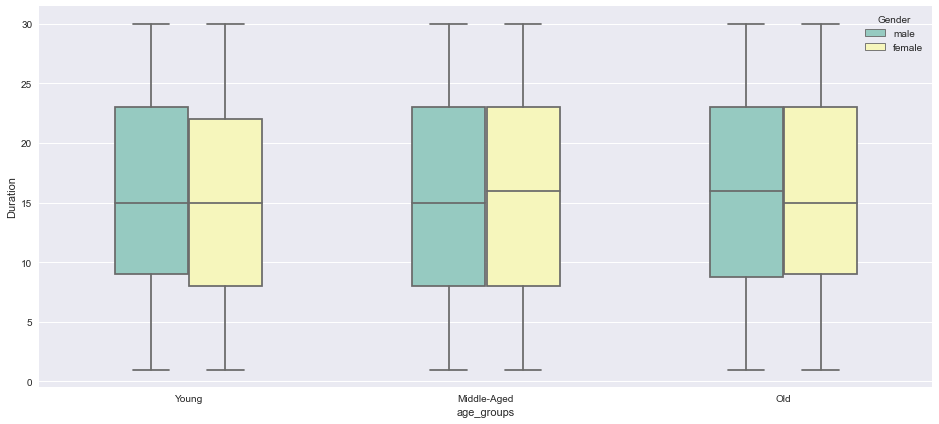

In [30]:
plt.figure(figsize=(16,7))
sns.boxplot(data=exercise_df , x= "age_groups" , y = "Duration" , hue = "Gender",palette="Set3",width=0.5)

As we can see , the exercise duration of each group is pretty identical.Every group have the same interquartile range , median and so on.

In addition, the duration is very similar for males and females in old and middle-aged groups.But in youth, males outperformed.

Another tip is, the median exercise duration of this dataset is about 15 minutes

In [31]:
print("median exercise duration in mins: " ,  exercise_df["Duration"].median())
print("mean exercise duration in mins: " ,  exercise_df["Duration"].mean())

median exercise duration in mins:  16.0
mean exercise duration in mins:  15.5306


# Gender

Lets plot the count plot of each gender to see how many exercisers are male and how many of them are female

<AxesSubplot:xlabel='Gender', ylabel='count'>

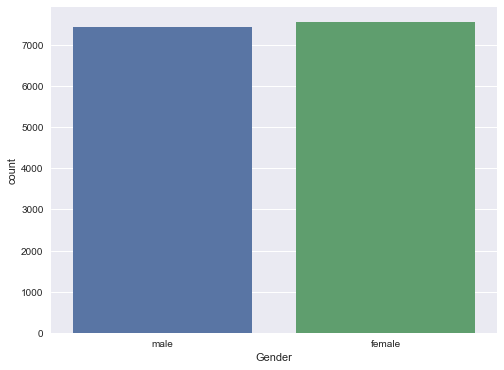

In [32]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = exercise_df , x = "Gender")

As we can see, number of females are slightly higher than man but this distinction is not significant.we can say, in general, they are equal

In this section, lets compare the Heart Rate between males and females

<AxesSubplot:xlabel='Gender', ylabel='Heart_Rate'>

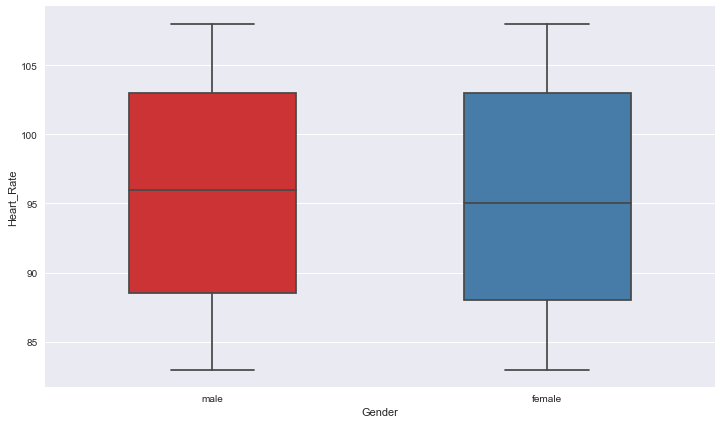

In [33]:
plt.figure(figsize=(12,7))
sns.boxplot(data=exercise_df , x= "Gender" , y = "Heart_Rate" ,palette="Set1",width=0.5)

we are going to categorize the bmi value and plot the graphs on different columns.



In [34]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

exercise_df["Categorized_Bmi"] = pd.cut(exercise_df["Bmi"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

exercise_df["Categorized_Bmi"] = exercise_df["Categorized_Bmi"].astype("object")
exercise_df.head()

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi,age_groups,Categorized_Bmi
0,male,68,29,105.0,40.8,181.0,26.04,Old,Overweight
1,female,20,14,94.0,40.3,66.0,21.77,Young,Normal
2,male,69,5,88.0,38.9,26.0,24.66,Old,Normal
3,female,34,13,100.0,40.5,71.0,22.16,Young,Normal
4,female,27,10,83.0,39.8,35.0,23.83,Young,Normal


In [35]:
ds = exercise_df["Categorized_Bmi"].value_counts().reset_index()
ds.columns = ["Categorized_Bmi" , "Count"]
ds

,Categorized_Bmi,Count
0,Normal,9476
1,Overweight,5524


As we can see, many parts of this dataset consists of Normal individuals.The second and last group is Overweight group.Other groups are not in the dataset which is normal.Because Obese and Underweight persons do not tend to do exercise.

So lets plot the boxplot of the first two categories.

<AxesSubplot:xlabel='Categorized_Bmi', ylabel='Count'>

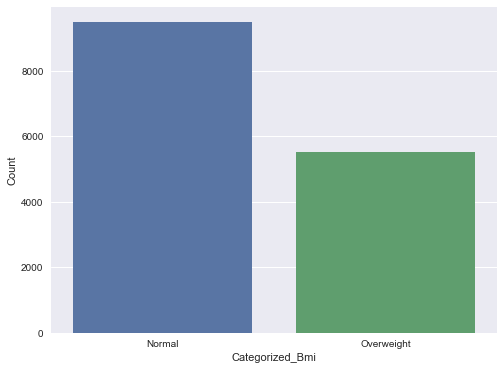

In [36]:
ds = ds[(ds["Categorized_Bmi"] == "Normal") | (ds["Categorized_Bmi"] == "Overweight")]  

plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_Bmi" , y = "Count")

As we can see, many parts of this dataset consists of Normal individuals.The second and last group is Overweight group.Other groups are not in the dataset which is normal.Because Obese and Underweight persons do not tend to do exercise.
Lets get into details and see how many of each group are male and how many of them are female.

First of all lets prepare the dataset that shows the distributions of Categorized_BMI for each gender:

In [37]:
ds =exercise_df[["Gender" ,"Categorized_Bmi"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_Bmi"])
ds.columns = ["Gender" , "Categorized_Bmi" , "Count"]
ds

,Gender,Categorized_Bmi,Count
0,female,Normal,7013
3,female,Overweight,540
2,male,Normal,2463
1,male,Overweight,4984


<AxesSubplot:xlabel='Categorized_Bmi', ylabel='Count'>

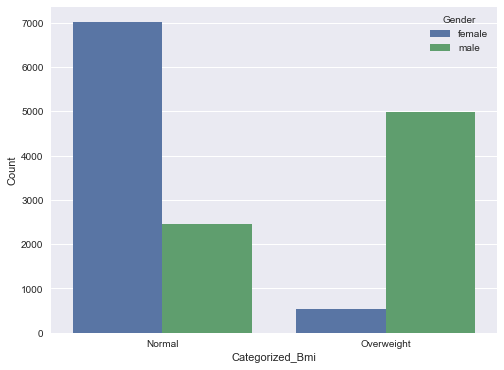

In [38]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_Bmi" , y = "Count" , hue = "Gender")

An interesting thing that this graph shows is the weight distribution between each gender.the number of males who are overweight is way more than the number of females that have the similar situation.And the number of females that are in their ideal weight is really large in compare of other categories.In general, women have a better situation than men.

...

Now lets plot the Categirized_BMI distribution for each group ages.

In [39]:
ds =exercise_df[["age_groups" ,"Categorized_Bmi"]].value_counts().reset_index().sort_values(by = ["age_groups" , "Categorized_Bmi"])
ds.columns = ["age_groups" , "Categorized_Bmi" , "Count"]
ds

,age_groups,Categorized_Bmi,Count
0,Young,Normal,5262
2,Young,Overweight,2240
1,Middle-Aged,Normal,2649
3,Middle-Aged,Overweight,1756
4,Old,Normal,1565
5,Old,Overweight,1528


<AxesSubplot:xlabel='Categorized_Bmi', ylabel='Count'>

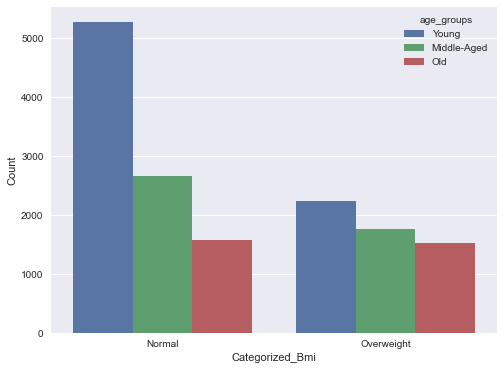

In [40]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_Bmi" , y = "Count" , hue = "age_groups")

As we can see the Categorized_BMI is identically distributed between age groups(the sequence is identical, for example in both Normal and Overweight ; Young comes first , 'Middle-Aged` comes second , etc.)

An interesting thing is , about 50% of old individuals have Normal weight and another 50% are Overweight.

Text(0, 0.5, 'Body Temperature')

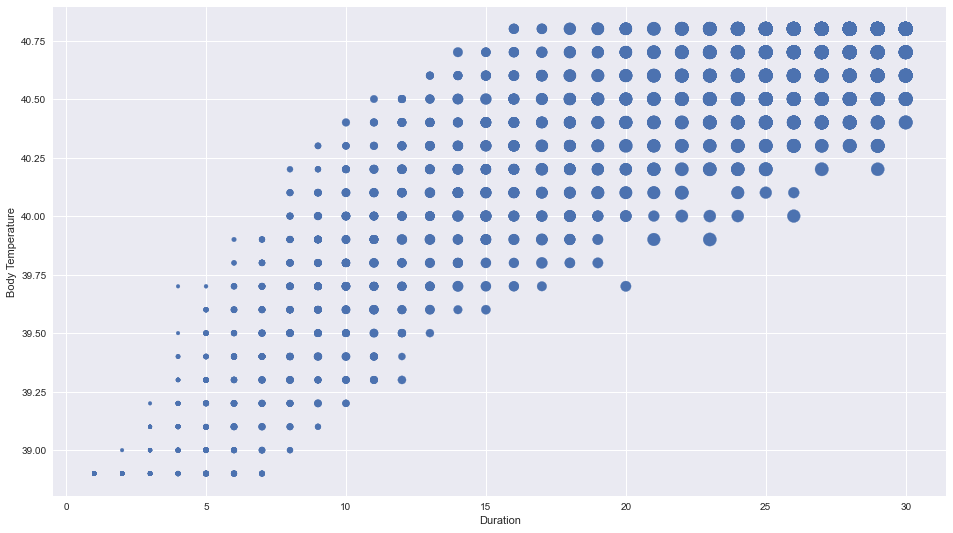

In [41]:
plt.figure(figsize=(16,9))
plt.scatter(data=exercise_df, x = "Duration" , y = "Body_Temp",s='Calories' )
plt.xlabel('Duration')
plt.ylabel('Body Temperature')

Before we feed our data to the model we have to first convert categorical column(like Gender) into numerical column using one hot encoding

In [42]:
exercise_df.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [43]:
exercise_df

,Gender,Age,Duration,Heart_Rate,Body_Temp,Calories,Bmi,age_groups,Categorized_Bmi
0,0,68,29,105.0,40.8,181.0,26.04,Old,Overweight
1,1,20,14,94.0,40.3,66.0,21.77,Young,Normal
2,0,69,5,88.0,38.9,26.0,24.66,Old,Normal
3,1,34,13,100.0,40.5,71.0,22.16,Young,Normal
4,1,27,10,83.0,39.8,35.0,23.83,Young,Normal
...,...,...,...,...,...,...,...,...,...
14995,1,20,11,92.0,40.4,45.0,23.09,Young,Normal
14996,1,27,6,85.0,39.2,23.0,23.88,Young,Normal
14997,1,43,16,90.0,40.1,75.0,22.94,Middle-Aged,Normal
14998,0,78,2,84.0,38.9,14.0,25.50,Old,Overweight


In [44]:
exercise_model = exercise_df[['Gender','Age','Duration','Heart_Rate','Bmi','Body_Temp','Calories']]
exercise_model

,Gender,Age,Duration,Heart_Rate,Bmi,Body_Temp,Calories
0,0,68,29,105.0,26.04,40.8,181.0
1,1,20,14,94.0,21.77,40.3,66.0
2,0,69,5,88.0,24.66,38.9,26.0
3,1,34,13,100.0,22.16,40.5,71.0
4,1,27,10,83.0,23.83,39.8,35.0
...,...,...,...,...,...,...,...
14995,1,20,11,92.0,23.09,40.4,45.0
14996,1,27,6,85.0,23.88,39.2,23.0
14997,1,43,16,90.0,22.94,40.1,75.0
14998,0,78,2,84.0,25.50,38.9,14.0


# Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scale = MinMaxScaler()

In [47]:
exercise_model[['Age','Duration','Heart_Rate','Bmi','Body_Temp','Calories']]=scale.fit_transform(exercise_model[['Age','Duration','Heart_Rate','Bmi','Body_Temp','Calories']])


In [48]:
exercise_model

,Gender,Age,Duration,Heart_Rate,Bmi,Body_Temp,Calories
0,0,0.813559,0.965517,0.88,0.679704,1.000000,1.000000
1,1,0.000000,0.448276,0.44,0.228330,0.736842,0.311377
2,0,0.830508,0.137931,0.20,0.533827,0.000000,0.071856
3,1,0.237288,0.413793,0.68,0.269556,0.842105,0.341317
4,1,0.118644,0.310345,0.00,0.446089,0.473684,0.125749
...,...,...,...,...,...,...,...
14995,1,0.000000,0.344828,0.36,0.367865,0.789474,0.185629
14996,1,0.118644,0.172414,0.08,0.451374,0.157895,0.053892
14997,1,0.389831,0.517241,0.28,0.352008,0.631579,0.365269
14998,0,0.983051,0.034483,0.04,0.622622,0.000000,0.000000


Seperating features and target

In [49]:
x = exercise_model.drop(columns=['Calories'], axis=1)
y = exercise_model['Calories']

In [50]:
print(x)

       Gender       Age  Duration  Heart_Rate       Bmi  Body_Temp
0           0  0.813559  0.965517        0.88  0.679704   1.000000
1           1  0.000000  0.448276        0.44  0.228330   0.736842
2           0  0.830508  0.137931        0.20  0.533827   0.000000
3           1  0.237288  0.413793        0.68  0.269556   0.842105
4           1  0.118644  0.310345        0.00  0.446089   0.473684
...       ...       ...       ...         ...       ...        ...
14995       1  0.000000  0.344828        0.36  0.367865   0.789474
14996       1  0.118644  0.172414        0.08  0.451374   0.157895
14997       1  0.389831  0.517241        0.28  0.352008   0.631579
14998       0  0.983051  0.034483        0.04  0.622622   0.000000
14999       0  0.728814  0.586207        0.36  0.717759   0.842105

[15000 rows x 6 columns]


In [51]:
print(y)

0        1.000000
1        0.311377
2        0.071856
3        0.341317
4        0.125749
           ...   
14995    0.185629
14996    0.053892
14997    0.365269
14998    0.000000
14999    0.502994
Name: Calories, Length: 15000, dtype: float64


# Building Regression Model

In [52]:
#Splitting the data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [53]:
print(x.shape, x_train.shape, x_test.shape)

(15000, 6) (12000, 6) (3000, 6)


# Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

 
Mean Squared Error (MSE) is the mean of the squared errors:

 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [54]:
#Applying LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
#print(lr.score(x_test,y_test)*100)
print("Linear Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , lr.predict(x_test)) , 2))
print("Linear Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , lr.predict(x_test)) , 2))
print("Linear Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,lr.predict(x_test))) , 2))

Linear Regression Mean Absolute Error(MAE) :  0.04
Linear Regression Mean Squared Error(MSE) :  0.0
Linear Regression Root Mean Squared Error(RMSE) :  0.05


In [55]:
#Applying RandomForest Regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
#print(rf.score(x_test,y_test)*100)
print("RandomForestRegressor Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , rf.predict(x_test)) , 2))
print("RandomForestRegressor Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , rf.predict(x_test)) , 2))
print("RandomForestRegressor Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,rf.predict(x_test))) , 2))

RandomForestRegressor Mean Absolute Error(MAE) :  0.01
RandomForestRegressor Mean Squared Error(MSE) :  0.0
RandomForestRegressor Root Mean Squared Error(RMSE) :  0.02


In [56]:
#Applying AdaBoostRegressor

from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
#print(ab.score(x_test,y_test)*100)
print("AdaBoostRegressor Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , ab.predict(x_test)) , 2))
print("AdaBoostRegressor Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , ab.predict(x_test)) , 2))
print("AdaBoostRegressor Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,ab.predict(x_test))) , 2))

AdaBoostRegressor Mean Absolute Error(MAE) :  0.05
AdaBoostRegressor Mean Squared Error(MSE) :  0.0
AdaBoostRegressor Root Mean Squared Error(RMSE) :  0.06


In [57]:
#Applying RidgeRegression

from sklearn.linear_model import Ridge
ri = Ridge()
ri.fit(x_train,y_train)
#print(ri.score(x_test,y_test)*100)
print("Ridge Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , ri.predict(x_test)) , 2))
print("Ridge Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , ri.predict(x_test)) , 2))
print("Ridge Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,ri.predict(x_test))) , 2))

Ridge Regression Mean Absolute Error(MAE) :  0.04
Ridge Regression Mean Squared Error(MSE) :  0.0
Ridge Regression Root Mean Squared Error(RMSE) :  0.05


In [58]:
#Applying DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
#print(dt.score(x_test,y_test)*100)
print("DecisionTree Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test , dt.predict(x_test)) , 2))
print("DecisionTree Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , dt.predict(x_test)) , 2))
print("DecisionTree Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,dt.predict(x_test))) , 2))

DecisionTree Regression Mean Absolute Error(MAE) :  0.02
DecisionTree Regression Mean Squared Error(MSE) :  0.0
DecisionTree Regression Root Mean Squared Error(RMSE) :  0.03


In [59]:
#Applying XGBOOST Regression

from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
#print(xgb.score(x_test,y_test)*100)
print("XGB Regression Mean Absolute Error(MAE) : " , round(metrics.mean_absolute_error(y_test, xgb.predict(x_test)) , 2))
print("XGB Regression Mean Squared Error(MSE) : " , round(metrics.mean_squared_error(y_test , xgb.predict(x_test)) , 2))
print("XGB Regression Root Mean Squared Error(RMSE) : " , round(np.sqrt(metrics.mean_squared_error(y_test ,xgb.predict(x_test))) , 2))

XGB Regression Mean Absolute Error(MAE) :  0.01
XGB Regression Mean Squared Error(MSE) :  0.0
XGB Regression Root Mean Squared Error(RMSE) :  0.02


# Comparative Analysis of algorithms

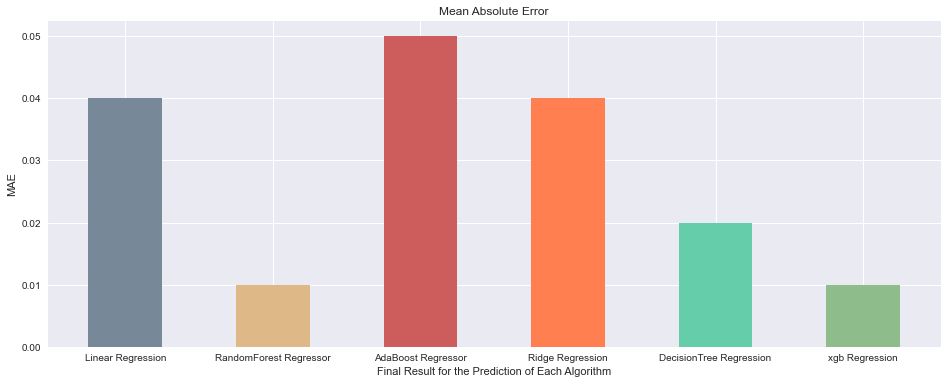

In [63]:
# Comparative Analysis of MAE

data_dict = {'Linear Regression':0.04, 'RandomForest Regressor':0.01, 'AdaBoost Regressor':0.05, 'Ridge Regression':0.04, 'DecisionTree Regression':0.02,'xgb Regression':0.01}
algms = list(data_dict.keys())
accuracy = list(data_dict.values())
fig = plt.figure(figsize = (16,6))
#  Bar plot
plt.bar(algms, accuracy,width = 0.5,color=['#778899','#DEB887','#CD5C5C','#FF7F50','#66CDAA','#8FBC8B'])
plt.xlabel("Final Result for the Prediction of Each Algorithm")
plt.ylabel("MAE")
plt.title("Mean Absolute Error")
plt.show()

By plotting the Mean Absolute Error value it shows that RandomForest and XGBoost Regressor giving better results when comparing with other algorithms
so XGBoost Regressor  and Random Forest will be the better for MAE.

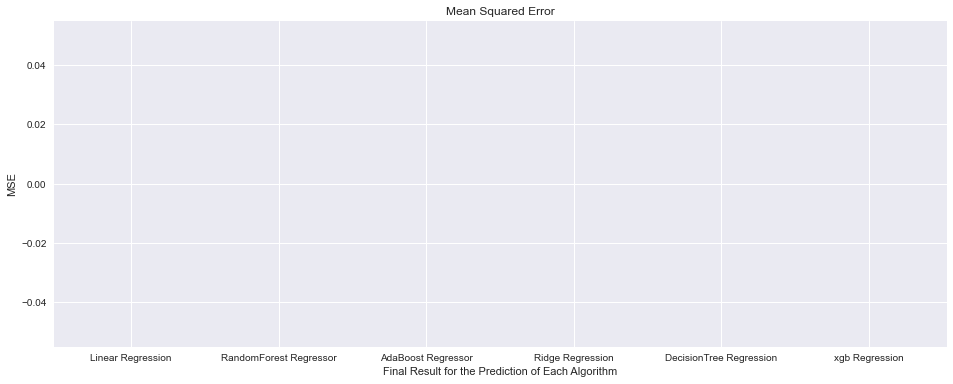

In [64]:
# Comparative Analysis of MSE

data_dict = {'Linear Regression':0.0, 'RandomForest Regressor':0.0, 'AdaBoost Regressor':0.0, 'Ridge Regression':0.0, 'DecisionTree Regression':0.0,'xgb Regression':0.0}
algms = list(data_dict.keys())
accuracy = list(data_dict.values())
fig = plt.figure(figsize = (16,6))
#  Bar plot
plt.bar(algms, accuracy,width = 0.5,color=['#778899','#DEB887','#CD5C5C','#FF7F50','#66CDAA','#8FBC8B'])
plt.xlabel("Final Result for the Prediction of Each Algorithm")
plt.ylabel("MSE")
plt.title("Mean Squared Error")
plt.show()

By taking consideration of Mean Squared Error all algorithmsgiving better prediction for MAE.

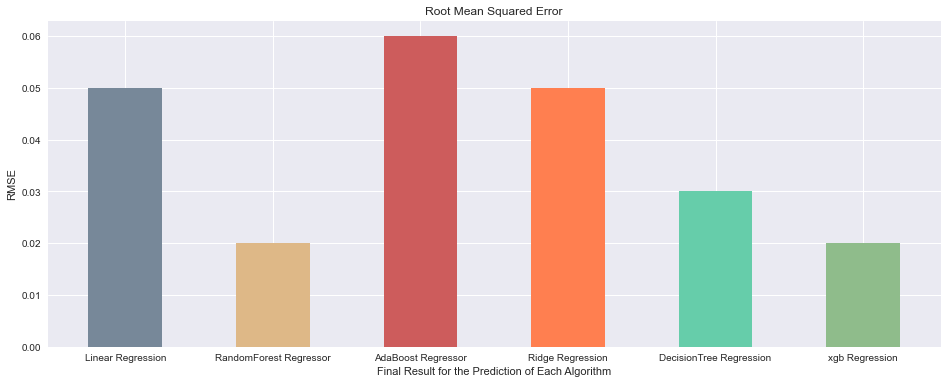

In [65]:
# Comparative Analysis of RMSE

data_dict = {'Linear Regression':0.05, 'RandomForest Regressor':0.02, 'AdaBoost Regressor':0.06, 'Ridge Regression':0.05, 'DecisionTree Regression':0.03,'xgb Regression':0.02}
algms = list(data_dict.keys())
accuracy = list(data_dict.values())
fig = plt.figure(figsize = (16,6))
#  Bar plot
plt.bar(algms, accuracy,width = 0.5,color=['#778899','#DEB887','#CD5C5C','#FF7F50','#66CDAA','#8FBC8B'])
plt.xlabel("Final Result for the Prediction of Each Algorithm")
plt.ylabel("RMSE")
plt.title("Root Mean Squared Error")
plt.show()

By consideration of Root Mean Squared Error RandomForest and XGBoost Regression giving better prediction for RMSE.

By comparing MAE, MSE, RMSE of all algorithms RandomForest and  XGBoost Regressor will make the better prediction when compared to other algorithms.